# Segmentation

_Tiffany Wang 260684152_

### 1.1 K-means clustering and Expectation Maximization

In [101]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 
import math

In [160]:
def plot_figs(imgs, title=None, max_col=4):
    n = len(imgs)
    sets = math.ceil(n // max_col)
    for s in range(sets):
        start = s * 8
        subset = img[start:min(start+8, n)]
        nb_rows = 2 if len(subset) > 4 else 1
        subplot = "{}{}".format(nb_rows, max_col)
        plt.figure(figsize=(20, 4 * nb_rows))
        for i in range(len(subset)):
            plt.subplot(int("{}{}".format(subplot, i+1)))
            if title is not None: 
                plt.title('{} {}'.format(title, start + i + 1))
            plt.axis('off')
            plt.imshow(imgs[start + i].astype(np.uint8))
    plt.show()

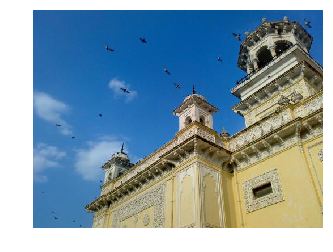

In [161]:
# Read 'home.jpg' picture in RGB.
home = cv2.imread('home.jpg')
home = cv2.cvtColor(home, cv2.COLOR_BGR2RGB)
plt.imshow(home), plt.axis('off')
plt.show()

###### Implement K-means clustering algorithm using only the numpy library. You can use opencv and matplotlib libraries only to read and display images but not for clustering. Apply k-means to the provided image with K=2 and K=3. Display the resulting segmented images for 10 iterations in both cases.

In [165]:
def k_means(img, k, iterations=10):
    h, w, ch = img.shape
    img = img.astype(np.float64)
    centers = np.random.random_sample((k, ch)) * 255.0
    evol = []
    for it in range(10):
        dists = np.array([img - c for c in centers])
        dists = np.linalg.norm(dists, axis=-1)
        clusters = np.argmin(dists, axis=0)
        evol.append(clusters)
        new_c = np.empty(shape=(k,ch))
        for c in range(k):
            np.mean(img[clusters == c], axis=0, out=new_c[c])
        centers = new_c

    plot_figs(evol, "iteration")

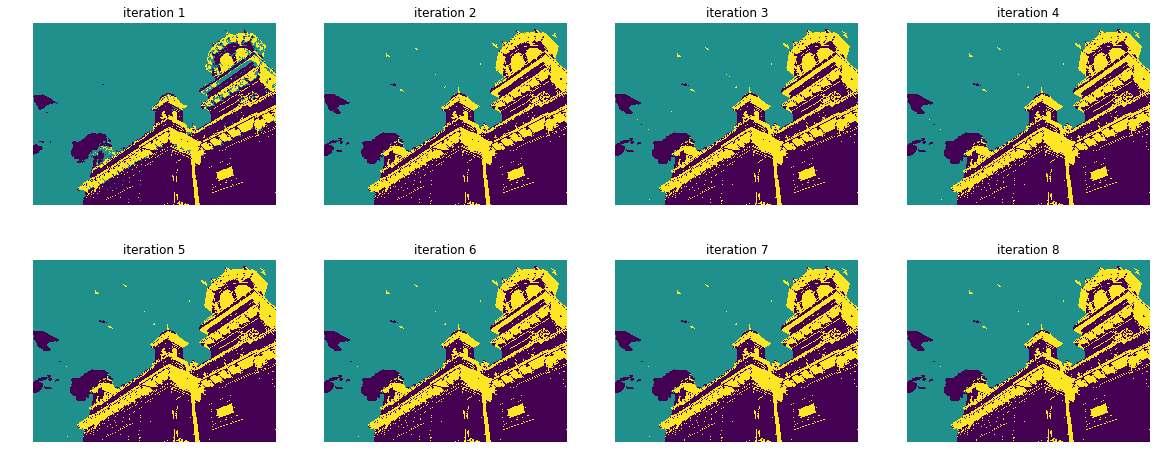

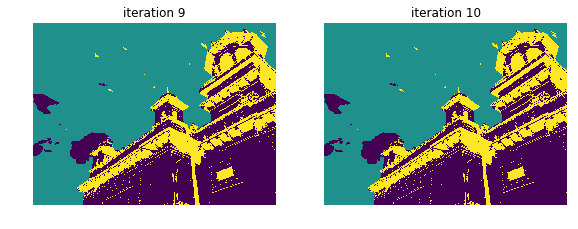

In [166]:
k_means(home, 3)

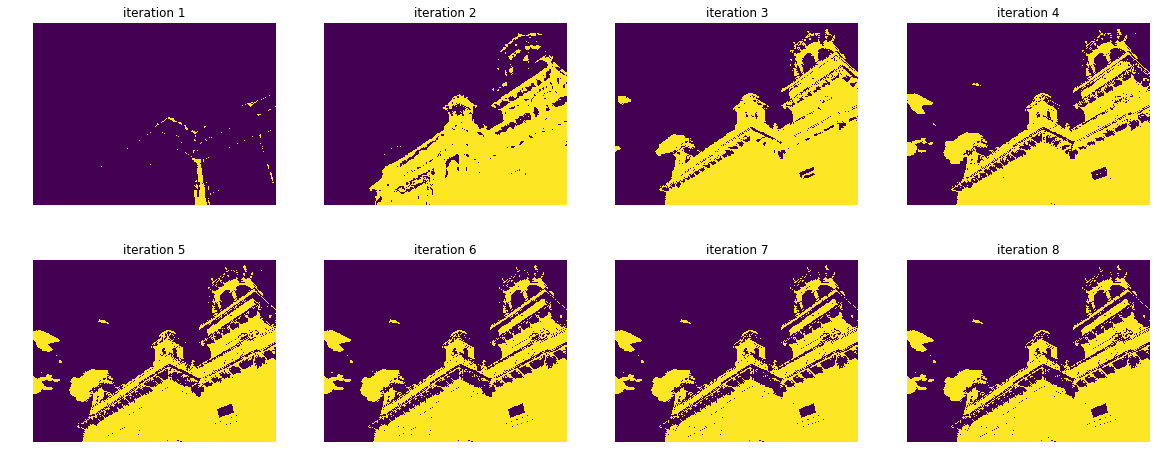

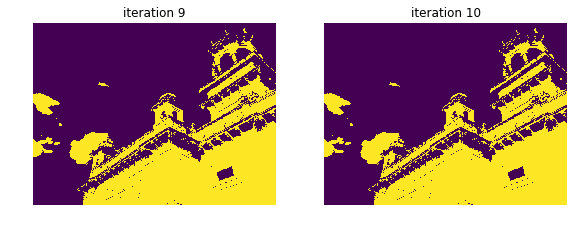

In [167]:
k_means(home, 2)